# Regression Analysis & Cross-Validation

In [1]:
#| echo: false
#| code-fold: true
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import json
np.random.seed(42)
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import holoviews as hv
import pandas as pd
import panel as pn
import numpy as np
import hvplot.pandas 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import requests
import cenpy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

C:\Users\cruse\mambaforge1\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\cruse\mambaforge1\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
C:\Users\cruse\mambaforge

## Plotting A Correlation Matrix

In [2]:
#| echo: true
#| code-fold: true
regression_df = pd.read_csv('regression_df.csv')

In [3]:
#| echo: false
#| code-fold: true
model = LinearRegression()
model

LinearRegression()

In [4]:
#| echo: true
#| code-fold: true
X = regression_df[['hw_value', 'oc_value', 'pmc_value', 'E_PARK', 'E_HOUAGE', 'smoking_prevalance','E_ROAD','blk_percent','white_percent','latino_percent', 'asian_percent', 'other_percent']].values
y = regression_df['asthma_prevalance'].values

In [5]:
#| echo: true
#| code-fold: true
feature_cols = [col for col in regression_df.columns if col not in ["asthma_prevalance", "geoid"]]
train_set, test_set = train_test_split(regression_df, test_size=0.3, random_state=42)
y_train = train_set["asthma_prevalance"].values
y_test = test_set["asthma_prevalance"].values
X_train = train_set[feature_cols].values
X_test = test_set[feature_cols].values


## Correlation Matrix
Using the seaborn package in python, we plot a correlation matrix for each of our predicotrs to observe relationships between different variables. From this matrix, we are able to see variables like ozone concentration and particle matter concentration are correlated. The smoking prevalence and health and wellness values are also correlated with one another. Lastly, we are able to see some disparities with this correlation matrix. 'blk_percent' and 'latino_percent' have a positive correlation with smoking prevalence and a negative correlation with health and wellness, indicating that a higher percentage of Black or Latino population in a given census tract is associated with a higher prevalence of smoking and lower health and wellness value.

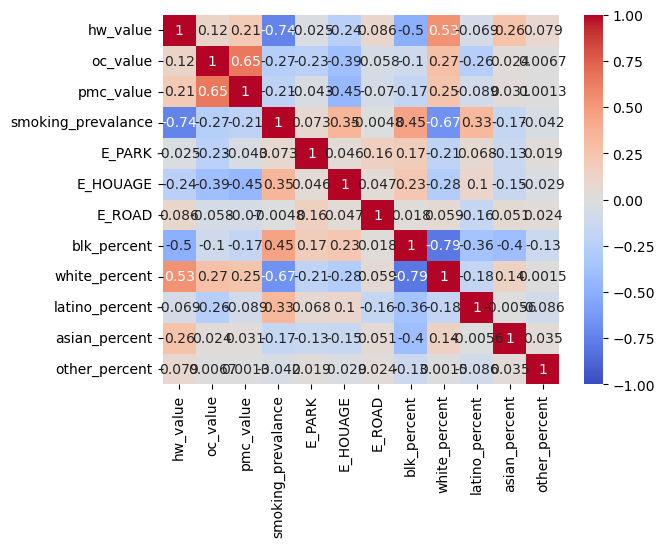

In [6]:
#| echo: true
#| code-fold: true
sns.heatmap(
    train_set[feature_cols].corr(), 
    cmap="coolwarm", 
    annot=True, 
    vmin=-1, 
    vmax=1
);

In [7]:
#| echo: true
#| code-fold: true
X.shape

(1179, 12)

In [8]:
#| echo: true
#| code-fold: true
y.shape

(1179,)

## Running Our Regressions
We want to use the best model for our data. So we use the 'scikit-learn' package to conduct and compare a linear regression model and a Random Forest Model. Linear regressions assume linear relationships between variables and is suitable when the relationship between input features and the dependent variable can be described linearly. The Random Forest Model is able to capture more complex relationships within the dataset and is robust against overfitting. 

### Linear Regression - R- Squared
Using the 'scikit-learn' library in Python, we performed a linear regression with feature scaling using a pipeline. To assess the model's predictive performance, we evalute the R-Square values on both the training and test datasets. We will compare these R-Squared values to the R-Squared values from our Random Forest Model to decide which model to use for predictions.

In [9]:
#| echo: false
#| code-fold: true
model.fit(X, y)

LinearRegression()

In [10]:
#| echo: false
#| code-fold: true
Rsq = model.score(X, y)
Rsq

0.8813734475169395

In [11]:
#| echo: true
#| code-fold: true
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())

print("Linear regression")
linear_pipe.fit(X_train, y_train)

training_score = linear_pipe.score(X_train, y_train)
print(f"Training Score = {training_score}")

test_score = linear_pipe.score(X_test, y_test)
print(f"Test Score = {test_score}")

Linear regression
Training Score = 0.8771018545312711
Test Score = 0.889628138385183


### Random Forest Model and Important Features - R-Squared
Using the 'scikit-learn' library in Python, we built a Random Forest Model with feature scaling using a pipeline. To assess the model's predictive performance, we evalute the R-Square values on both the training and test datasets.

In [12]:
#| echo: true
#| code-fold: true
forest_pipe = make_pipeline(
    StandardScaler(),  # Pre-process step
    RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42),  # Model step
)

print("Random forest")
forest_pipe.fit(X_train, y_train)

training_score = forest_pipe.score(X_train, y_train)
print(f"Training Score = {training_score}")

test_score = forest_pipe.score(X_test, y_test)
print(f"Test Score = {test_score}")

Random forest
Training Score = 0.802226720882675
Test Score = 0.7982253593098484


Based off of the R-squared values, it seems as though the linear regression model may do a better job at predicting variability in the dependent variable. 

In [13]:
#| echo: false
#| code-fold: true
forest_pipe.named_steps
forest_model = forest_pipe['randomforestregressor']

In [32]:
#| echo: true
#| code-fold: true
importance = pd.DataFrame(
    {"Feature": feature_cols, "Importance": forest_model.feature_importances_}
).sort_values("Importance", ascending=False)

### Random Forest Model - Feature Importance
The random forest model assesses the contribution of each feature in predicting the target variable. This information helps us understand which features have the most influence on the model's prediction and gain insights to how we can improve the model's performance in the future. From Our Feature Importance table, were able to see that features such as percent of White population, smoking prevalence, health and wellness value, and percent of Black population within a given census tract in Philadelphia are the most important features in our Random Forest Model. 

In [16]:
#| echo: true
#| code-fold: true
importance

,Feature,Importance
8,white_percent,0.435131
3,smoking_prevalance,0.380354
0,hw_value,0.139769
7,blk_percent,0.044746
1,oc_value,0.000000
2,pmc_value,0.000000
4,E_PARK,0.000000
5,E_HOUAGE,0.000000
6,E_ROAD,0.000000
9,latino_percent,0.000000


In [17]:
#| echo: true
#| code-fold: true
import hvplot.pandas
importance.sort_values("Importance", ascending=True).hvplot.barh(
    x="Feature", y="Importance", title="Factors that Impact Asthma Prevalance"
)

:Bars   [Feature]   (Importance)

In [18]:
#| echo: true
#| code-fold: true
model = linear_pipe['linearregression']

## Cross-Validation
For each model, we conduct a 3 fold cross-validation for both of our models. The model is trained three time, each time using a different fold as the test set and the remaining folds for training. The R-squared scores are computed for each fold. Higher R-Squared values indicate a better predictive performance. We will select the model with the highest average R-Squared across folds.

### Linear Regression - Cross Validation
The results from our 3-fold cross-validation for a linear regression model are presented below.

In [19]:
#| echo: true
#| code-fold: true
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())

# Run the 3-fold cross validation
scores = cross_val_score(
    linear_pipe,
    X_train,
    y_train,
    cv=3,
)

# Report
print("R^2 scores = ", scores)
print("Scores mean = ", scores.mean())
print("Score std dev = ", scores.std())

R^2 scores =  [0.87672721 0.86979481 0.86632107]
Scores mean =  0.8709476945361351
Score std dev =  0.004325797875727253


### Random Forest Regression - Cross Validation
The results from our 3-fold cross-validation for a linear regression model are presented below. Based off of the average R-squared across folds, this model has a better predictive performance for our data. We will use this model to make predictions for asthma prevalence. 

In [20]:
#| echo: true
#| code-fold: true
forest_pipe = make_pipeline(
    StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)
)

# Run the 3-fold cross validation
scores = cross_val_score(
    forest_pipe,
    X_train,
    y_train,
    cv=3,
)

# Report
print("R^2 scores = ", scores)
print("Scores mean = ", scores.mean())
print("Score std dev = ", scores.std())

R^2 scores =  [0.8692119  0.91654952 0.9188434 ]
Scores mean =  0.9015349385674881
Score std dev =  0.022875019221878082


## Model Performance
After using the random forest model to predict asthma values, we assess our model's predictive capabilities to calculate our mean percent error.

In [21]:
#| echo: false
#| code-fold: true
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [22]:
#| echo: false
#| code-fold: true
pipe.named_steps

{'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42)}

In [23]:
#| echo: false
#| code-fold: true
model_step = "randomforestregressor"
param_grid = {
    f"{model_step}__n_estimators": [5, 10, 15, 20, 30, 50, 100, 200],
    f"{model_step}__max_depth": [2, 5, 7, 9, 13, 21, 33, 51],
}

param_grid

{'randomforestregressor__n_estimators': [5, 10, 15, 20, 30, 50, 100, 200],
 'randomforestregressor__max_depth': [2, 5, 7, 9, 13, 21, 33, 51]}

In [24]:
#| echo: false
#| code-fold: true
grid = GridSearchCV(pipe, param_grid, cv=3, verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'randomforestregressor__max_depth': [2, 5, 7, 9, 13,
                                                              21, 33, 51],
                         'randomforestregressor__n_estimators': [5, 10, 15, 20,
                                                                 30, 50, 100,
                                                                 200]},
             verbose=1)

In [25]:
#| echo: true
#| code-fold: true
def evaluate_mape(model, X_test, y_test):
    """
    Given a model and test features/targets, print out the 
    mean absolute error and accuracy
    """
    # Make the predictions
    predictions = model.predict(X_test)

    # Absolute error
    errors = abs(predictions - y_test)
    avg_error = np.mean(errors)

    # Mean absolute percentage error
    mape = 100 * np.mean(errors / y_test)

    # Accuracy
    accuracy = 100 - mape

    print("Model Performance")
    print(f"Average Absolute Error: {avg_error:0.4f}")
    print(f"Accuracy = {accuracy:0.2f}%.")

    return accuracy

### Our Model's Accuracy
Our model boasts an accuracy of 97.68%, suggesting that our model's prediction closely align with the values provided by the CDC. 

In [26]:
#| echo: true
#| code-fold: true
base_model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Fit the training set
base_model.fit(X_train, y_train)

# Evaluate on the test set
base_accuracy = evaluate_mape(base_model, X_test, y_test)

Model Performance
Average Absolute Error: 0.2733
Accuracy = 97.68%.


In [27]:
#| echo: true
#| code-fold: true
data = regression_df.loc[test_set.index]

In [28]:
#| echo: true
#| code-fold: true
censustracts = gpd.read_file('Census_Tracts_2010.geojson')
tract_and_geoid = censustracts[['GEOID10', 'TRACTCE10']]
tract_and_geoid = tract_and_geoid.rename(columns = {'TRACTCE10':'tract'})

censustracts = censustracts[['GEOID10', 'geometry']]
censustracts = censustracts.rename(columns = {'GEOID10':'geoid'})
censustracts['geoid'] = censustracts['geoid'].astype(np.int64)

In [29]:
#| echo: true
#| code-fold: true
data['prediction'] = base_model.predict(X_test)
data.to_csv('data.csv', index=False)

In [30]:
#| echo: true
#| code-fold: true
data = pd.merge(data, censustracts, on='geoid', how ='inner')

In [31]:
#| echo: true
#| code-fold: true
data = gpd.GeoDataFrame(data, geometry = 'geometry')